In [1]:
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\SRINIVAS
[nltk_data]     SRIKAKOLAPU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_bodies=pd.read_csv('train_bodies.csv')
train_stances=pd.read_csv('train_stances.csv')

In [3]:
train_data=pd.merge(train_bodies,train_stances,how='left',on='Body ID')

In [4]:
test_stance = pd.read_csv('competition_test_stances.csv')
test_body = pd.read_csv('test_bodies.csv')

In [5]:
test_data  = pd.merge( test_body, test_stance,how='left', on='Body ID')

In [6]:
target={'unrelated':0, 'agree':1, 'discuss':2, 'disagree':3}
train_data['Stance']=train_data['Stance'].map(target)
test_data["Stance"]=test_data['Stance'].map(target)

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import string

def preprocessing(df,text):
    df["new"+text] = df[text].str.replace("\\n"," ",regex=True)
    df["new"+text] = df["new"+text].str.replace("_NEG","",regex=True)
    df["new"+text] = df["new"+text].str.replace("_NEGFIRST", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"#","",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\*","",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'s","",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'m","am",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'ve","have",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"n\'t", " not",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'re", " are",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'d", "would",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'ll", " will",regex=True)
    df["new"+text] = df["new"+text].str.replace(r",", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"!", " !",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\(", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\)", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\?", " ?",regex=True)
    df["new"+text] = df["new"+text].str.replace(r'[^\x00-\x7F]',' ',regex=True)
    df["new"+text] = df["new"+text].str.replace(r'[^\w\s]',' ',regex=True)
    df["new"+text] = df["new"+text].str.replace("\d+", " ",regex=True)
    
    #df[text] = df[text].str.replace((r"\s{2,}", " "))
    
    df["new"+text] = df["new"+text].apply(lambda x: x.rstrip(',|.|;|:|\'|"'))
    df["new"+text] = df["new"+text].apply(lambda x: x.lstrip('\'|"'))

    
    
  

In [8]:

import pandas as pd
import string
from nltk.stem import PorterStemmer


def preprocessing1(df, column, stopwords):
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    
    # Create a stemmer object
    stemmer = PorterStemmer()
    
    # Define a function to clean the text
    def clean(text):
        
        # Remove punctuation
        text = text.translate(translator)
        # Split the text into words
        words = text.split()
        # Remove stopwords
        words = [word for word in words if word.lower() not in stopwords]
        # Stem the words
        words = [stemmer.stem(word) for word in words]
        # Join the words back into a string
        return ' '.join(words)
    
    # Apply the clean function to the specified column
    df[column] = df[column].apply(clean)
    
    return df



stop_words=set(stopwords.words('english'))



In [9]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
#df = clean_text(df, 'text', stop_words)

In [11]:
train_data

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0
...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1


In [12]:
test_data

,Body ID,articleBody,Headline,Stance
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,0
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,1
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,0
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,0
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,0
...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,3
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,1
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,3
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,3


# PREPROCESSING  DONE

In [13]:
preprocessing(train_data,"Headline")



In [14]:
preprocessing(train_data,"articleBody")


In [15]:
preprocessing1(train_data,"newarticleBody",stop_words)


,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0,Soldier shot Parliament locked down after gunf...,small meteorit crash wood area nicaragua capit...
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0,Tourist dubbed Spider Man after spider burro...,small meteorit crash wood area nicaragua capit...
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0,Luke Somers killed in failed rescue attempt i...,small meteorit crash wood area nicaragua capit...
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0,BREAKING Soldier shot at War Memorial in Ottawa,small meteorit crash wood area nicaragua capit...
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0,Giant ft in catfish weighing stone caught ...,small meteorit crash wood area nicaragua capit...
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1,Pizza delivery man gets tipped more than fo...,ann arbor mich pizza deliveri man michigan got...
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1,Pizza delivery man gets tip,ann arbor mich pizza deliveri man michigan got...
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1,Luckiest Pizza Delivery Guy Ever Gets Tip,ann arbor mich pizza deliveri man michigan got...
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1,Ann Arbor pizza delivery driver surprised with...,ann arbor mich pizza deliveri man michigan got...


In [16]:
preprocessing1(train_data,"newHeadline",stop_words)


,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0,soldier shot parliament lock gunfir erupt war ...,small meteorit crash wood area nicaragua capit...
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0,tourist dub spider man spider burrow skin day,small meteorit crash wood area nicaragua capit...
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0,luke somer kill fail rescu attempt yemen,small meteorit crash wood area nicaragua capit...
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0,break soldier shot war memori ottawa,small meteorit crash wood area nicaragua capit...
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0,giant ft catfish weigh stone caught itali thou...,small meteorit crash wood area nicaragua capit...
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1,pizza deliveri man get tip singl deliveri,ann arbor mich pizza deliveri man michigan got...
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1,pizza deliveri man get tip,ann arbor mich pizza deliveri man michigan got...
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1,luckiest pizza deliveri guy ever get tip,ann arbor mich pizza deliveri man michigan got...
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1,ann arbor pizza deliveri driver surpris tip,ann arbor mich pizza deliveri man michigan got...


In [17]:
preprocessing(test_data,"Headline")


In [18]:
preprocessing(test_data,"articleBody")


In [19]:
preprocessing1(test_data,"newarticleBody",stop_words)


,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,0,Apple installing safes in store to protect gol...,al sisi deni isra report state offer extend ga...
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,1,El Sisi denies claims he will give Sinai land ...,al sisi deni isra report state offer extend ga...
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,0,Apple to keep gold Watch Editions in special i...,al sisi deni isra report state offer extend ga...
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,0,Apple Stores to Keep Gold Edition Apple Watc...,al sisi deni isra report state offer extend ga...
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,0,South Korean woman hair eaten by robot vacuu...,al sisi deni isra report state offer extend ga...
...,...,...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,3,A Sign That Obamacare Exchanges Are Failing,rememb much republican want repeal obamacar re...
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,1,Republicans call Obamacare a failure These ...,rememb much republican want repeal obamacar re...
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,3,CBO s Alternate Facts Show Obamacare is Unsust...,rememb much republican want repeal obamacar re...
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,3,Why Obamacare failed,rememb much republican want repeal obamacar re...


In [20]:
preprocessing1(test_data,"newHeadline",stop_words)

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,0,appl instal safe store protect gold watch edit,al sisi deni isra report state offer extend ga...
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,1,el sisi deni claim give sinai land palestinian,al sisi deni isra report state offer extend ga...
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,0,appl keep gold watch edit special store safe,al sisi deni isra report state offer extend ga...
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,0,appl store keep gold edit appl watch custom safe,al sisi deni isra report state offer extend ga...
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,0,south korean woman hair eaten robot vacuum cle...,al sisi deni isra report state offer extend ga...
...,...,...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,3,sign obamacar exchang fail,rememb much republican want repeal obamacar re...
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,1,republican call obamacar failur chart show cou...,rememb much republican want repeal obamacar re...
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,3,cbo altern fact show obamacar unsustain,rememb much republican want repeal obamacar re...
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,3,obamacar fail,rememb much republican want repeal obamacar re...


In [21]:
train_data

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0,soldier shot parliament lock gunfir erupt war ...,small meteorit crash wood area nicaragua capit...
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0,tourist dub spider man spider burrow skin day,small meteorit crash wood area nicaragua capit...
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0,luke somer kill fail rescu attempt yemen,small meteorit crash wood area nicaragua capit...
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0,break soldier shot war memori ottawa,small meteorit crash wood area nicaragua capit...
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0,giant ft catfish weigh stone caught itali thou...,small meteorit crash wood area nicaragua capit...
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1,pizza deliveri man get tip singl deliveri,ann arbor mich pizza deliveri man michigan got...
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1,pizza deliveri man get tip,ann arbor mich pizza deliveri man michigan got...
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1,luckiest pizza deliveri guy ever get tip,ann arbor mich pizza deliveri man michigan got...
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1,ann arbor pizza deliveri driver surpris tip,ann arbor mich pizza deliveri man michigan got...


In [22]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

train_data["newHeadlinetokens"] = train_data["newHeadline"].apply(tokenizer.tokenize)
train_data["newarticleBodytokens"]=train_data["newarticleBody"].apply(tokenizer.tokenize)
test_data["newHeadlinetokens"]=test_data["newHeadline"].apply(tokenizer.tokenize)
test_data["newarticleBodytokens"]=test_data["newarticleBody"].apply(tokenizer.tokenize)

In [23]:
sentence_lengths1 = [len(tokens) for tokens in train_data["newHeadlinetokens"]]
sentence_lengths2 = [len(tokens) for tokens in train_data["newarticleBodytokens"]]
sentence_lengths3=  [len(tokens) for tokens in test_data["newarticleBodytokens"]]
sentence_lengths4=[len(tokens) for tokens in test_data["newHeadlinetokens"]]

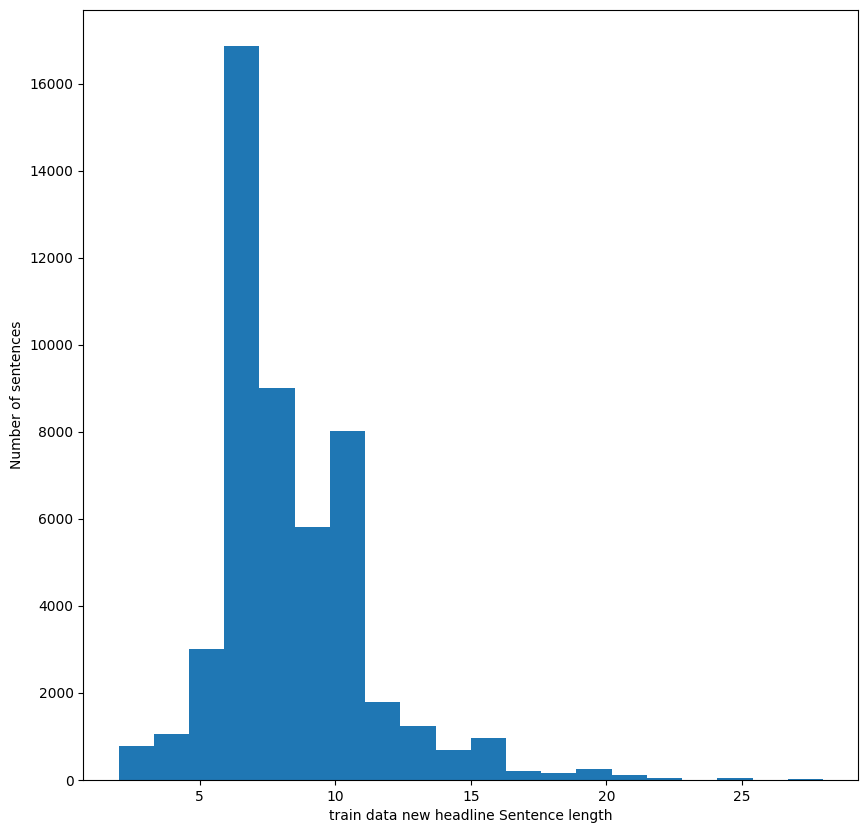

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('train data new headline Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths1,bins=20)
plt.show()

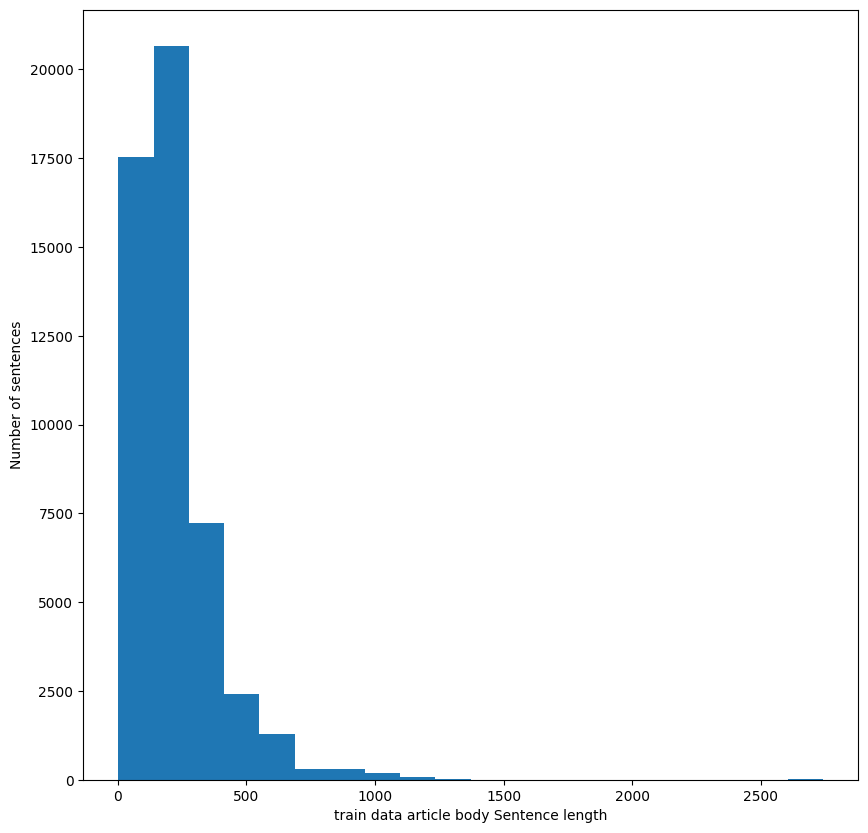

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('train data article body Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths2,bins=20)
plt.show()

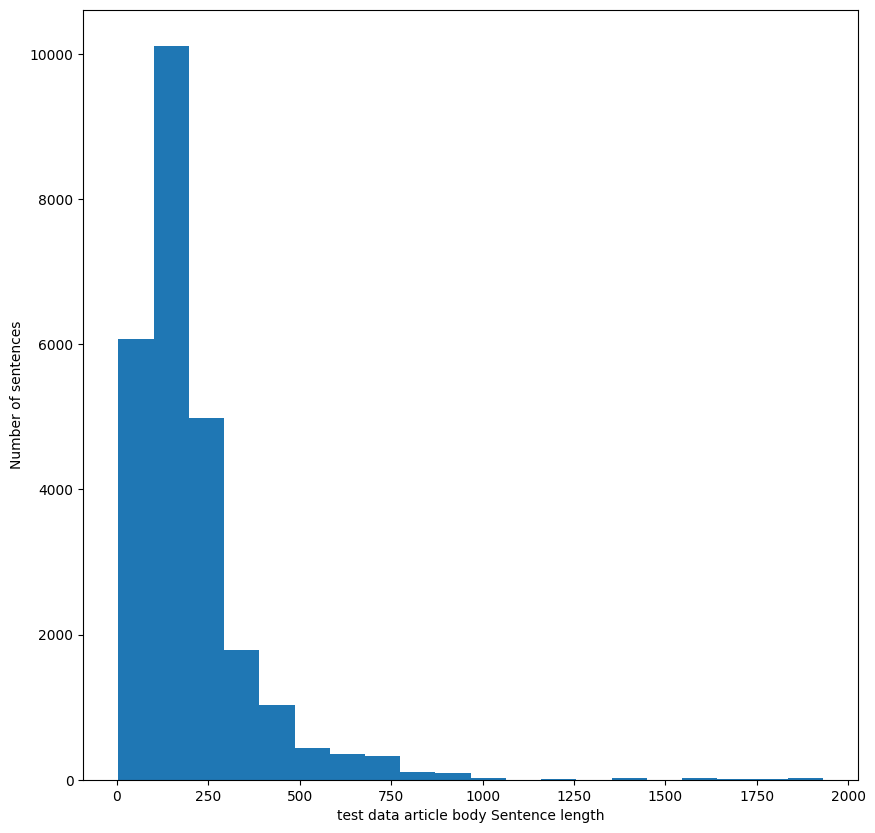

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('test data article body Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths3,bins=20)
plt.show()

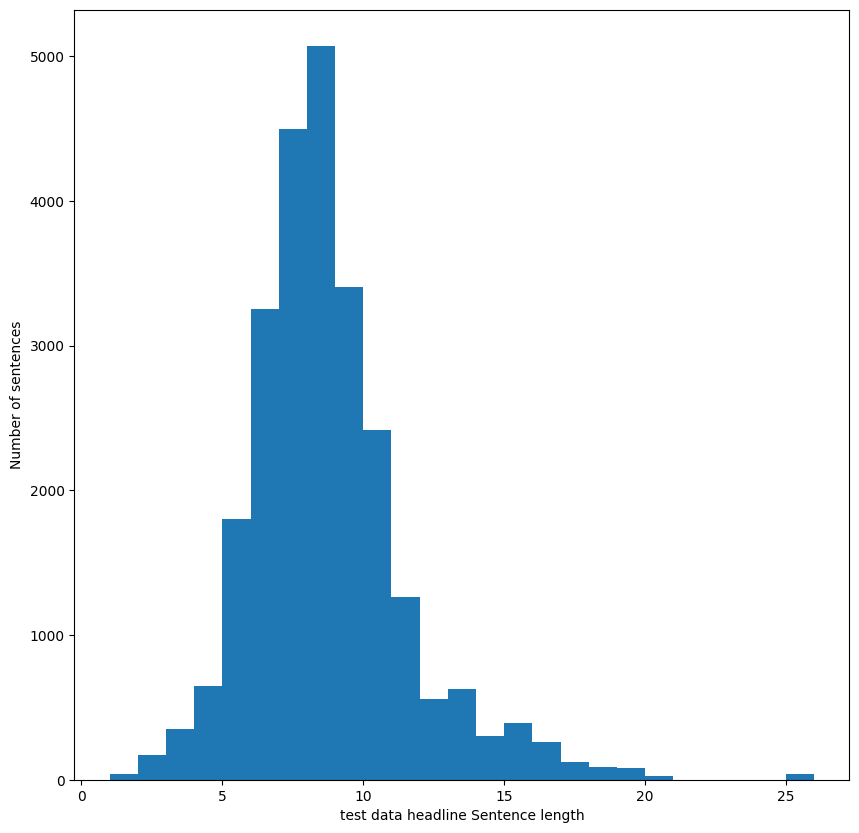

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('test data headline Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths4,bins=25)
plt.show()

In [28]:
print("Max sentence length of train data newHeadline columns is %s" % max(sentence_lengths1))
print("Max sentence length of train data newarticleBody is %s" % max(sentence_lengths2))
print("Max sentence length of test data newarticleBody is %s" % max(sentence_lengths3))
print("Max sentence length of test data newHeadline  is %s" % max(sentence_lengths4))

Max sentence length of train data newHeadline columns is 28
Max sentence length of train data newarticleBody is 2742
Max sentence length of test data newarticleBody is 1931
Max sentence length of test data newHeadline  is 26


In [29]:
data1=train_data['newHeadline']+" "+train_data['newarticleBody']

In [30]:
data2=test_data['newHeadline']+" "+test_data['newarticleBody']

In [31]:
data1 = pd.DataFrame(data1)
data1.columns = ['combined']
data2 = pd.DataFrame(data2)
data2.columns = ['combined']

In [32]:
data3=pd.concat([data1['combined'],data2['combined']],axis = 0)

In [33]:
data3.reset_index(drop=True)

0        soldier shot parliament lock gunfir erupt war ...
1        tourist dub spider man spider burrow skin day ...
2        luke somer kill fail rescu attempt yemen small...
3        break soldier shot war memori ottawa small met...
4        giant ft catfish weigh stone caught itali thou...
                               ...                        
75380    sign obamacar exchang fail rememb much republi...
75381    republican call obamacar failur chart show cou...
75382    cbo altern fact show obamacar unsustain rememb...
75383    obamacar fail rememb much republican want repe...
75384    success afford care act huge inconveni truth o...
Name: combined, Length: 75385, dtype: object

In [34]:
data3=pd.DataFrame(data3,columns=["combined"])

In [35]:
data3=data3.reset_index(drop=True)

In [36]:
data3

,combined
0,soldier shot parliament lock gunfir erupt war ...
1,tourist dub spider man spider burrow skin day ...
2,luke somer kill fail rescu attempt yemen small...
3,break soldier shot war memori ottawa small met...
4,giant ft catfish weigh stone caught itali thou...
...,...
75380,sign obamacar exchang fail rememb much republi...
75381,republican call obamacar failur chart show cou...
75382,cbo altern fact show obamacar unsustain rememb...
75383,obamacar fail rememb much republican want repe...


In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
#X_train_prep_combined = train_data['newHeadline'] + train_data['newarticleBody']
#X_train_prep_combined = pd.DataFrame(X_train_prep_combined)
#X_train_prep_combined.columns = ['combined']
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data3['combined'])
words_to_index = tokenizer.word_index

In [38]:
len(words_to_index)

19145

In [39]:
data5=pd.DataFrame(columns=["headline","articlebody"])
data5["headline"]=train_data["newHeadline"]
data5["articlebody"]=train_data["newarticleBody"]
data5["stance"]=train_data["Stance"]
data5=data5.reset_index(drop=True)


In [40]:
data6=pd.DataFrame(columns=["headline","articlebody"])
data6["headline"]=test_data["newHeadline"]
data6["articlebody"]=test_data["newarticleBody"]
data6["stance"]=test_data["Stance"]
data6=data6.reset_index(drop=True)



In [41]:

data7=pd.concat([data5,data6],axis=0)
data7=data7.reset_index(drop=True)



In [42]:
from keras.utils import pad_sequences
train_head = tokenizer.texts_to_sequences(data7['headline'])
train_head = pad_sequences(train_head, maxlen=30, padding='post')
train_body = tokenizer.texts_to_sequences(data7['articlebody'])
train_body = pad_sequences(train_body, maxlen=2742, padding='post')
train_head = train_head[:49972,:]
train_body = train_body[:49972,:]

In [43]:
test_head = tokenizer.texts_to_sequences(test_data['newHeadline'])
test_head = pad_sequences(test_head, maxlen=30, padding='post')
test_body = tokenizer.texts_to_sequences(test_data['newarticleBody'])
test_body = pad_sequences(test_body, maxlen=2742, padding='post')

# CREATING WORD2VEC MODEL 

In [68]:
sentences=[]
for i in data3["combined"][:49972]:
    tokens=word_tokenize(i)
    sentences.append(tokens)
    
    

In [69]:
import gensim
model=gensim.models.Word2Vec(sentences=sentences,workers=4,min_count=4)

In [70]:
words=list(model.wv.vectors)

In [71]:
filename="word2vec.txt"
model.wv.save_word2vec_format(filename,binary=False)

In [72]:
import os
embedding_index={}
f=open(os.path.join('',"word2vec.txt"),encoding="utf-8")
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:])
    embedding_index[word]=coefs
f.close()

In [73]:
embedding_index


{'14640': array(['100'], dtype='<U3'),
 'said': array(['1.8149356', '-0.7527568', '0.96526486', '-0.42129704',
        '1.1901771', '-3.1527085', '-0.0075708055', '0.65702057',
        '0.247709', '0.7739054', '0.07861568', '-0.5188944', '0.90371096',
        '-4.6956778', '0.49442005', '2.4496982', '-0.5177314', '1.571599',
        '-0.8597648', '-0.9320113', '0.7591655', '-1.0901191', '-1.374166',
        '-1.4916922', '-1.4406419', '-0.3374926', '2.3971653',
        '-0.012709947', '1.1746815', '0.5957414', '-3.8100183',
        '0.13760206', '-2.7695951', '0.27542552', '1.9429775',
        '-2.1438735', '-0.5527821', '-0.24092206', '-0.9662833',
        '0.4467829', '1.134459', '-3.1090825', '2.85163', '2.3480418',
        '-0.05980891', '-2.1631992', '1.625228', '0.76846826',
        '-0.29752648', '-3.1727796', '-0.37533852', '-2.7147477',
        '-1.1305003', '-1.3944747', '0.69020385', '-1.072557',
        '0.25792348', '1.9940546', '-1.3682908', '0.19387758',
        '-0.3918

In [74]:
num_words=18357
embedding_matrix=np.zeros((num_words,100))
for word,i in words_to_index.items():
    
    if i>num_words-1:
        continue
    embedding_vector=embedding_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [75]:
embedding_matrix.shape

(18357, 100)

# CNN-LSTM MODEL IMPLEMENTATION WITH PREPROCESSED DATA 

In [52]:
"""ytrain_prepdata=train_data['Stance']
ytest_prepdata=test_data['Stance']"""

"ytrain_prepdata=train_data['Stance']\nytest_prepdata=test_data['Stance']"

In [53]:
"""from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Input, Lambda, LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers import concatenate"""

'from keras.models import Sequential, Model\nfrom keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Input, Lambda, LSTM\nfrom keras.layers.convolutional import Conv1D\nfrom keras.layers.pooling import MaxPooling1D\nfrom keras.layers import concatenate'

In [54]:

"""from keras.layers import Input, Embedding, Conv2D, MaxPooling2D, Dropout, concatenate, LSTM, Dense
from keras.models import Model

head_input = Input(shape=(2742,), dtype='int32', name='head_input')
body_input = Input(shape=(2742,), dtype='int32', name='body_input')
embedding_layer = Embedding(18357, 100, weights=[embedding_matrix], input_length=2742, trainable=False)
head_embed = embedding_layer(head_input)
body_embed = embedding_layer(body_input)

conv_1 = Conv2D(filters=64, kernel_size=(5, 5), strides=4, activation="relu", name='conv1', padding="same")
pool_1 = MaxPooling2D(pool_size=(4, 4), strides=4, name='pool1')
head_CNN = conv_1(head_embed)
head_CNN = pool_1(head_CNN)
head_CNN = Dropout(0.2)(head_CNN)

conv_2 = Conv2D(filters=64, kernel_size=(5, 5), strides=4, activation="relu", name='conv2', padding="same")
pool_2 = MaxPooling2D(pool_size=(4, 4), strides=4, name='pool2')
body_CNN = conv_2(body_embed)
body_CNN = pool_2(body_CNN)
body_CNN = Dropout(0.2)(body_CNN)

conc = concatenate([head_CNN,body_CNN])
lstm1 = LSTM(100)
total=lstm1(conc)

dense = Dense(4, activation='softmax')(total)

model = Model(inputs=[head_input,body_input], outputs=dense)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
print(model.summary())"""


'from keras.layers import Input, Embedding, Conv2D, MaxPooling2D, Dropout, concatenate, LSTM, Dense\nfrom keras.models import Model\n\nhead_input = Input(shape=(2742,), dtype=\'int32\', name=\'head_input\')\nbody_input = Input(shape=(2742,), dtype=\'int32\', name=\'body_input\')\nembedding_layer = Embedding(18357, 100, weights=[embedding_matrix], input_length=2742, trainable=False)\nhead_embed = embedding_layer(head_input)\nbody_embed = embedding_layer(body_input)\n\nconv_1 = Conv2D(filters=64, kernel_size=(5, 5), strides=4, activation="relu", name=\'conv1\', padding="same")\npool_1 = MaxPooling2D(pool_size=(4, 4), strides=4, name=\'pool1\')\nhead_CNN = conv_1(head_embed)\nhead_CNN = pool_1(head_CNN)\nhead_CNN = Dropout(0.2)(head_CNN)\n\nconv_2 = Conv2D(filters=64, kernel_size=(5, 5), strides=4, activation="relu", name=\'conv2\', padding="same")\npool_2 = MaxPooling2D(pool_size=(4, 4), strides=4, name=\'pool2\')\nbody_CNN = conv_2(body_embed)\nbody_CNN = pool_2(body_CNN)\nbody_CNN = Dr

In [55]:
""""model.fit([train_head, train_body], ytrain_prepdata, validation_split = 0.2, epochs=10, batch_size=32, verbose=True)"""

'"model.fit([train_head, train_body], ytrain_prepdata, validation_split = 0.2, epochs=10, batch_size=32, verbose=True)'

In [56]:
"""from keras.layers import Reshape
from tensorflow.keras import regularizers

head_input = Input(shape=(2742,), dtype='int32', name='head_input')
body_input = Input(shape=(2742,), dtype='int32', name='body_input')
embedding_layer = Embedding(18357,100,weights=[embedding_matrix],input_length=2742,trainable=False)
head_embed = embedding_layer(head_input)
body_embed = embedding_layer(body_input)

conv_1=Conv1D(filters=64,kernel_size=5,strides=4,activation="relu",name='conv1',padding="same")
pool_1 = MaxPooling1D(pool_size=4, strides=4, name='pool1')
head_CNN = conv_1(head_embed)
head_CNN = pool_1(head_CNN)
head_CNN=Dropout(0.2)(head_CNN)

conv_2=Conv1D(filters=64,kernel_size=5,strides=4,activation="relu",name='conv2',padding="same")
pool_2 = MaxPooling1D(pool_size=4, strides=4, name='pool2')
body_CNN = conv_2(body_embed)
body_CNN = pool_2(body_CNN)
body_CNN=Dropout(0.2)(body_CNN)
conc = concatenate([head_CNN,body_CNN])
lstm1 = LSTM(100)
total=lstm1(conc)





dense = Dense(4,activation='softmax')(total)

model1 = Model(inputs=[head_input,body_input], outputs=dense)
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
print(model1.summary())"""

'from keras.layers import Reshape\nfrom tensorflow.keras import regularizers\n\nhead_input = Input(shape=(2742,), dtype=\'int32\', name=\'head_input\')\nbody_input = Input(shape=(2742,), dtype=\'int32\', name=\'body_input\')\nembedding_layer = Embedding(18357,100,weights=[embedding_matrix],input_length=2742,trainable=False)\nhead_embed = embedding_layer(head_input)\nbody_embed = embedding_layer(body_input)\n\nconv_1=Conv1D(filters=64,kernel_size=5,strides=4,activation="relu",name=\'conv1\',padding="same")\npool_1 = MaxPooling1D(pool_size=4, strides=4, name=\'pool1\')\nhead_CNN = conv_1(head_embed)\nhead_CNN = pool_1(head_CNN)\nhead_CNN=Dropout(0.2)(head_CNN)\n\nconv_2=Conv1D(filters=64,kernel_size=5,strides=4,activation="relu",name=\'conv2\',padding="same")\npool_2 = MaxPooling1D(pool_size=4, strides=4, name=\'pool2\')\nbody_CNN = conv_2(body_embed)\nbody_CNN = pool_2(body_CNN)\nbody_CNN=Dropout(0.2)(body_CNN)\nconc = concatenate([head_CNN,body_CNN])\nlstm1 = LSTM(100)\ntotal=lstm1(con

In [57]:
"""model1.fit([train_head, train_body], ytrain_prepdata, validation_split = 0.2, epochs=10, batch_size=32, verbose=True)"""

'model1.fit([train_head, train_body], ytrain_prepdata, validation_split = 0.2, epochs=10, batch_size=32, verbose=True)'

In [58]:
"""loss, accuracy = model.evaluate([test_head,test_body], ytest_prepdata)"""

'loss, accuracy = model.evaluate([test_head,test_body], ytest_prepdata)'

# WORKING WITH GLOVE PRE TRAINED VECTORS

In [59]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
  return word_to_vec_map

In [60]:
word_to_vec_map = read_glove_vector('glove.6B.100d.txt')

In [61]:



emb_matrix = np.zeros((19145, 100))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
        if index<19145:
            emb_matrix[index, :] = embedding_vector

        
        
            
            

In [62]:
emb_matrix.shape

(19145, 100)

In [63]:
ytrain_prepdata=data7["stance"]
ytest_prepdata=test_data["Stance"]

In [112]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Input, Lambda, LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers import concatenate
from keras.layers import Reshape
from tensorflow.keras import regularizers
head_input = Input(shape=(30,), dtype='int32', name='head_input')
body_input = Input(shape=(2742,), dtype='int32', name='body_input')
embedding_layer = Embedding(18357,100,weights=[embedding_matrix],input_length=2742,trainable=False)
head_embed = embedding_layer(head_input)
body_embed = embedding_layer(body_input)
print(head_embed)
print(body_embed)

pool_1 = MaxPooling1D(pool_size=4, strides=4, name='pool1')
conv_1 = Conv1D(filters=64,kernel_size=5,strides=4,activation="relu", name='conv1',kernel_regularizer=regularizers.l2(0.00000001))
head_CNN=conv_1(head_embed)
head_CNN = pool_1(head_CNN)
head_CNN=Dropout(0.2)(head_CNN)



head_CNN = Flatten()(head_CNN)


conv_2 = Conv1D(64, 5, strides=4, name='conv2',activation="relu",kernel_regularizer=regularizers.l2(0.0000000001))
pool_3 = MaxPooling1D(pool_size=4, strides=4, name='pool3')
body_CNN = conv_2(body_embed)
body_CNN = pool_3(body_CNN)
body_CNN=Dropout(0.2)(body_CNN)



body_CNN=Flatten()(body_CNN)




conc = concatenate([head_CNN,body_CNN])

lstm_input = Reshape((-1, conc.shape[1]))(conc)
lstm = LSTM(100,activation="relu")(lstm_input)

dense = Dense(20,activation='relu')(lstm)
dense = Dropout(0.2)(dense)
dense = Dense(4,activation='softmax')(dense)
model = Model(inputs=[head_input,body_input], outputs=[dense])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
print(model.summary())

KerasTensor(type_spec=TensorSpec(shape=(None, 30, 100), dtype=tf.float32, name=None), name='embedding_16/embedding_lookup/Identity_1:0', description="created by layer 'embedding_16'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2742, 100), dtype=tf.float32, name=None), name='embedding_16/embedding_lookup/Identity_1:0', description="created by layer 'embedding_16'")
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 head_input (InputLayer)        [(None, 30)]         0           []                               
                                                                                                  
 body_input (InputLayer)        [(None, 2742)]       0           []                               
                                                                                                  
 embedding_16 (Emb

In [113]:
model.fit([train_head,train_body],ytrain_prepdata[:49972],validation_data = ([test_head,test_body],ytest_prepdata),epochs=20, batch_size=64,verbose = True,validation_split=0.2)

Epoch 1/20
781/781 [==============================] - 23s 27ms/step - loss: 0.6150 - acc: 0.7732 - val_loss: 0.7404 - val_acc: 0.7252
Epoch 2/20
781/781 [==============================] - 21s 27ms/step - loss: 0.3967 - acc: 0.8486 - val_loss: 0.7950 - val_acc: 0.7148
Epoch 3/20
781/781 [==============================] - 21s 27ms/step - loss: 0.3264 - acc: 0.8793 - val_loss: 0.8739 - val_acc: 0.6745
Epoch 4/20
781/781 [==============================] - 21s 27ms/step - loss: 0.2800 - acc: 0.8980 - val_loss: 0.9128 - val_acc: 0.6710
Epoch 5/20
781/781 [==============================] - 21s 27ms/step - loss: 0.2455 - acc: 0.9118 - val_loss: 0.9801 - val_acc: 0.6834
Epoch 6/20
781/781 [==============================] - 21s 27ms/step - loss: 0.2246 - acc: 0.9184 - val_loss: 0.9990 - val_acc: 0.6738
Epoch 7/20
781/781 [==============================] - 21s 27ms/step - loss: 0.2072 - acc: 0.9256 - val_loss: 0.9725 - val_acc: 0.6882
Epoch 8/20
781/781 [==============================] - 21s 27ms

In [110]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict([test_head,test_body])
labels = np.argmax(y_pred,axis = -1)
cm = confusion_matrix(ytest_prepdata,labels)
cm

795/795 [==============================] - 5s 6ms/step


array([[15703,  1168,  1478,     0],
       [ 1080,   445,   378,     0],
       [ 2385,   377,  1702,     0],
       [  474,   119,   104,     0]], dtype=int64)